In [1]:
#Write a program to that reads one Shakespeare play, creates N word chunks at the interval of n words (i.e. if n=10, chunk 1 starts at 1, chunk 2 starts at 10, chunk 3 starts at 30 etc) and plots the chunk number on the x axis and the type-token ratio on the Y axis.
#For submission, use "Romeo and Juliet" as your play and set N to 1000, n=10.

In [4]:
def tokenize(s):
    return s.split()
#Allows the file/text to be returned as a list of words that can be counted

In [5]:
#the first step should be to open the Romeo and Juliet file, which can be done by first using the glob module and opening up the Romeo and Juliet text 
import glob

path = 'Romeo_and_Juliet/*'
filenames = glob.glob(path)
print(filenames)


[]


In [6]:
#preprocess the string to strip punctuation which will return me a list of strings (tokens)
def preprocess(s, lowercase=True, strip_punctuation=True):
    punctuation = '.,?<>:;"\'!%'
    if isinstance(s, str):
        s = tokenize(s)
    if lowercase:
        s = [t.lower() for t in s]
    if strip_punctuation:
        s = [t.strip(punctuation) for t in s]
    return(s)

In [8]:
#the next step is to read the file as a string using the function read()

file = 'romeo_and_juliet/*'
f = preprocess(open(file, 'r').read())


FileNotFoundError: [Errno 2] No such file or directory: 'romeo_and_juliet/*'

In [6]:
#then I need to run the token frequency on the Romeo and Juliet file, which takes in a list of words and returns the count of each word(how often each word appears) which returns a dictionary of words and their frequencies
def token_frequency(tokens, tf={}, relative=False):
    for t in tokens:
        if t in tf:
            tf[t]+=1
        else:
            tf[t]=1
    if relative:
        tf = {k:v/len(tokens) for k, v in tf.items()}
    return tf

In [7]:
#then I want to save the token frequency and define it as a variable so it can be referenced later

d = token_frequency(f, relative=True)

In [8]:
# then I want to make a list of the frequencies
a = [v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)]

In [17]:
#then I want to take the first 1000 words from the list of frequency values
a= a[:1000]

In [18]:
#the next step is to split them into chunks of 10 words (100 chunks)
chunks = [a[x:x+10] for x in range(0, len(a), 10)]

In [19]:
print(chunks)

[[0.0279453661806603, 0.02769398357633652, 0.024048935813641696, 0.021618903971845148, 0.01868610692140104, 0.01604658957600134, 0.014957264957264958, 0.014454499748617396, 0.014412602647896766, 0.013155689626277861], [0.012192056309703369, 0.011563599798893917, 0.011018937489525725, 0.010809451985922574, 0.009845818669348081, 0.00934305346070052, 0.00934305346070052, 0.00904977375565611, 0.008714596949891068, 0.007499581028992793], [0.006996815820345232, 0.006871124518183342, 0.006535947712418301, 0.006535947712418301, 0.00628456510809452, 0.006158873805932629, 0.006075079604491369, 0.005739902798726328, 0.005614211496564438, 0.005362828892240657], [0.005320931791520027, 0.005069549187196246, 0.0047762694821518355, 0.004734372381431205, 0.004692475280710575, 0.004608681079269315, 0.004315401374224904, 0.004231607172783643, 0.004022121669180492, 0.003980224568459863], [0.0038964303670186023, 0.003728841964136082, 0.0036031506619741915, 0.003477459359812301, 0.003435562259091671, 0.0034

100


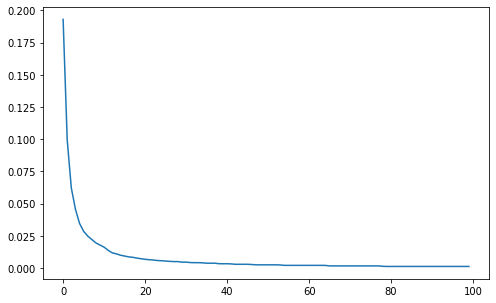

In [20]:
import matplotlib.pyplot as plt

def type_token(s, ratio=True):
    types = len(set(s))
    tokens = len(s)
    
    return (types/tokens) if ratio else (types, tokens)

y = []
for window in range(len(chunks)):
    y.append(sum(chunks[window]))
x = list(range(100))

print(len(chunks))

plt.figure(figsize=(8,5))
plt.plot(x, y)
#The final step is to make the plot of the chunk number and type_token ratio